In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [197]:
data=pd.read_csv(r"D:\ML\Reviews.csv",sep=',')
df=pd.DataFrame(data)
data1 = df[df['Score'] != 3]
data1.loc[data.Score >3,'Score'] = 1
data1.loc[data.Score <3,'Score'] = 0

C:\Users\Vaibhav\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


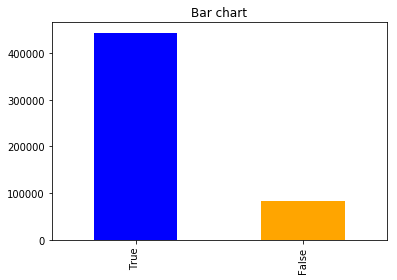

True     443777
False     82037
Name: Score, dtype: int64


In [198]:
count_Class=pd.value_counts(data1["Score"]==1, sort= True)
count_Class.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Bar chart')
plt.show()
print(count_Class)


In [199]:
sort_data = data1.sort_values(by=["ProductId"], axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

fields=['ProductId','UserId','ProfileName','Time','Text','Score']
sort_by_column = pd.DataFrame(sort_data,columns=fields)
sort_by_column.shape

#show only duplicated data
dup=sort_by_column[sort_data.duplicated(['UserId','ProfileName','Time','Text'])]
dup.shape

#drop duplicates from sorted dataframe
dup_drop=sort_by_column.drop_duplicates(['UserId','ProfileName','Time','Text'],keep='first')
dup_drop.shape

(364173, 6)

In [6]:
#dup_drop.head()

In [200]:
import nltk
from nltk.corpus import stopwords
import re
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup

In [201]:
nltk.download('stopwords')
stop_words=set(stopwords.words('english'))
corpus=[]
length=len(dup_drop)
sent=[]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vaibhav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [202]:
abc = {r"n\'t":" not",r"\'re": " are",r"\'s":" is",r"\'d": " would",r"\'ll":" will",r"\'ve":" have",r"\'m":" am"}
for i in range(0,length):
    sent_0 = dup_drop['Text'].values[i]
    sent_0 = sent_0.lower()
    for key , values in abc.items():
        sent_0 = re.sub(key,values, sent_0)
    #sent_0=re.sub(r'<[^>]+>','',sent_0)
    dup_drop['Text'].values[i]=sent_0
    sent.append(sent_0)


In [ ]:
dup_drop['Text'].values[100]

'pros:<br />dog will do anything for this treat.<br />does not smell as bad as many other treats.<br />easy to break into smaller pieces.<br />nothing artificial, easy digestion.<br /><br />cons:<br />more costly than other dog treats.<br /><br />overall, this is a great product. while more expensive, my dog will do anything for this treat. he has several phobias, including getting in and out of the car, and walking through doorways, but he ignores all of his fears to get to this treat.'

In [ ]:
tags=[]
for i in range(0,length):
    sent_0 = dup_drop['Text'].values[i]
    #sent_0=re.sub(r'<[^>]+>','',sent_0)
    soup = BeautifulSoup(sent_0, 'lxml')
    text = soup.get_text()
    dup_drop['Text'].values[i]=text
    tags.append(sent_0)


In [ ]:
tags